In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen
from statsmodels.formula.api import ols
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans as kmeans
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm


from scipy.spatial.distance import euclidean as d2

C:\Users\DELL XPS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\DELL XPS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
gold = yf.download("GC=F")
silver = yf.download("SI=F")
copper = yf.download("HG=F")
platinum = yf.download("PL=F")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
def close(df,name):
    tmp = df[['Close']]
    tmp.columns = [[name]]
    return tmp

In [4]:
def openp(df,name):
    ext = df[['Open']]
    ext.columns = [[name]]
    return ext

In [5]:
g_c = close(gold,'gold_close')
s_c = close(silver, 'silver_close')
c_c = close(copper, 'copper_close')
p_c = close(platinum, 'platinum_close')
g_o = openp(gold, 'g_open')
s_o = openp(silver, 's_open')
c_o = openp(copper, 'c_open')
p_o = openp(platinum, 'p_open')

In [6]:
son_gold = g_o.join([g_c,s_c,c_c,p_c]).dropna()
son_sil = s_o.join([g_c,s_c,c_c,p_c]).dropna()
son_cop = c_o.join([g_c,s_c,c_c,p_c]).dropna()
son_pla = p_o.join([g_c,s_c,c_c,p_c]).dropna()

In [7]:
model = ols('g_open ~ gold_close + silver_close + copper_close + platinum_close', data=son_gold).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 g_open   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.514e+06
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:44:41   Log-Likelihood:                -18733.
No. Observations:                4865   AIC:                         3.748e+04
Df Residuals:                    4860   BIC:                         3.751e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3007      0.661     -0.455      0.649      -1.596       0.995
gold_close         1.0007      0.001   1105.206      0.000       0.999       1.002
silver_close      -0.0581      0.059     -0.980      0.327      -0.174       0.058
copper_close      -0.1382      0.359     -0.385      0.700      -0.842       0.565
platinum_close     0.0009      0.001      0.987      0.324      -0.001       0.003
==============================================================================
Omnibus:                     1577.262   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31020.119
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                      15.190   Cond. No.                     6.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I think this is a good model because the Adj R-squared value is equal to 1 which means our regression fits the data perfectly, also variables' P-values are not bad.

In [30]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
gold_close,1.0,1.302577e+09,1.302577e+09,1.005410e+07,0.000000
silver_close,1.0,1.836309e+01,1.836309e+01,1.417377e-01,0.706576
copper_close,1.0,4.627111e+00,4.627111e+00,3.571491e-02,0.850113
platinum_close,1.0,1.266866e+02,1.266866e+02,9.778461e-01,0.322780
Residual,4860.0,6.296462e+05,1.295568e+02,NaN,NaN


In [31]:
model2 = ols('s_open ~ gold_close + silver_close + copper_close + platinum_close', data=son_sil).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.050e+05
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:09:44   Log-Likelihood:                -1318.2
No. Observations:                4865   AIC:                             2646.
Df Residuals:                    4860   BIC:                             2679.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0207      0.018     -1.122      0.262      -0.057       0.015
gold_close      5.189e-05   2.53e-05      2.055      0.040    2.39e-06       0.000
silver_close       0.9975      0.002    603.452      0.000       0.994       1.001
copper_close      -0.0086      0.010     -0.860      0.390      -0.028       0.011
platinum_close  3.297e-05   2.66e-05      1.240      0.215   -1.92e-05    8.51e-05
==============================================================================
Omnibus:                     3825.116   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           496921.920
Skew:                           2.999   Prob(JB):                         0.00
Kurtosis:                      52.147   Cond. No.                     6.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is a good one for silver opening prices. We have great R-square and P-values.

In [32]:
sm.stats.anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
gold_close,1.0,276324.242851,276324.242851,2.742234e+06,0.000000
silver_close,1.0,88440.198452,88440.198452,8.776780e+05,0.000000
copper_close,1.0,0.004556,0.004556,4.521262e-02,0.831622
platinum_close,1.0,0.154940,0.154940,1.537621e+00,0.215032
Residual,4860.0,489.723288,0.100766,NaN,NaN


In [8]:
model3 = ols('c_open ~ gold_close+ silver_close + copper_close + platinum_close', data=son_cop).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 c_open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.034e+06
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:44:53   Log-Likelihood:                 8993.5
No. Observations:                4865   AIC:                        -1.798e+04
Df Residuals:                    4860   BIC:                        -1.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0009      0.002     -0.413      0.679      -0.005       0.003
gold_close      5.944e-06   3.03e-06      1.960      0.050   -4.67e-10    1.19e-05
silver_close       0.0002      0.000      1.176      0.240      -0.000       0.001
copper_close       0.9947      0.001    827.593      0.000       0.992       0.997
platinum_close  3.168e-06   3.19e-06      0.992      0.321   -3.09e-06    9.43e-06
==============================================================================
Omnibus:                      815.065   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16115.909
Skew:                          -0.131   Prob(JB):                         0.00
Kurtosis:                      11.913   Cond. No.                     6.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model5 = ols('c_open ~ gold_close', data=son_cop).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 c_open   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                 1.078e+04
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:04:53   Log-Likelihood:                -4579.7
No. Observations:                4865   AIC:                             9163.
Df Residuals:                    4863   BIC:                             9176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6718      0.021     31.763      0.000       0.630       0.713
gold_close     0.0018   1.72e-05    103.809      0.000       0.002       0.002
==============================================================================
Omnibus:                      478.641   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.878
Skew:                           0.778   Prob(JB):                    7.70e-147
Kurtosis:                       3.948   Cond. No.                     2.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I tried to make a model for copper opening prices with gold's closing prices, however we can see that it's not a good model, providing us a value of 0.689 R^2. Model 3 is better for copper prices, where we consider all variables.

In [34]:
sm.stats.anova_lm(model3)

,df,sum_sq,mean_sq,F,PR(>F)
gold_close,1.0,4147.885177,4147.885177,2.853941e+06,0.00000
silver_close,1.0,434.866130,434.866130,2.992084e+05,0.00000
copper_close,1.0,1429.874101,1429.874101,9.838210e+05,0.00000
platinum_close,1.0,0.001414,0.001414,9.730484e-01,0.32397
Residual,4860.0,7.063468,0.001453,NaN,NaN


In [16]:
model4 = ols('p_open ~ gold_close + silver_close  + copper_close + platinum_close', data=son_pla).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 p_open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.078e+06
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:09:59   Log-Likelihood:                -17510.
No. Observations:                4865   AIC:                         3.503e+04
Df Residuals:                    4860   BIC:                         3.506e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3592      0.514      0.699      0.485      -0.649       1.367
gold_close      7.239e-06      0.001      0.010      0.992      -0.001       0.001
silver_close       0.0218      0.046      0.473      0.637      -0.069       0.112
copper_close       0.2201      0.279      0.789      0.430      -0.327       0.767
platinum_close     0.9985      0.001   1346.476      0.000       0.997       1.000
==============================================================================
Omnibus:                     2709.305   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434411.904
Skew:                           1.611   Prob(JB):                         0.00
Kurtosis:                      49.181   Cond. No.                     6.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When comparing platinum opening prices to others' closing prices, we may have a better model if we drop gold's closing variables that has 0.983 P-value.

In [36]:
sm.stats.anova_lm(model4)

,df,sum_sq,mean_sq,F,PR(>F)
gold_close,1.0,1.638154e+08,1.638154e+08,2.092839e+06,0.0
silver_close,1.0,2.836979e+08,2.836979e+08,3.624409e+06,0.0
copper_close,1.0,6.192295e+07,6.192295e+07,7.911025e+05,0.0
platinum_close,1.0,1.420964e+08,1.420964e+08,1.815366e+06,0.0
Residual,4860.0,3.804129e+05,7.827425e+01,NaN,NaN


In [17]:
model6 = ols('p_open ~  silver_close  + copper_close + platinum_close', data=son_pla).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 p_open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.772e+06
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:10:05   Log-Likelihood:                -17510.
No. Observations:                4865   AIC:                         3.503e+04
Df Residuals:                    4861   BIC:                         3.505e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3623      0.414      0.875      0.382      -0.450       1.174
silver_close       0.0221      0.030      0.732      0.464      -0.037       0.081
copper_close       0.2218      0.228      0.971      0.331      -0.226       0.669
platinum_close     0.9985      0.001   1794.992      0.000       0.997       1.000
==============================================================================
Omnibus:                     2709.197   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434379.612
Skew:                           1.611   Prob(JB):                         0.00
Kurtosis:                      49.179   Cond. No.                     3.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Between Model4 and Model 6, I think Model6 is a better fit for platinum prices, where we dont use gold closing price.

In [ ]:
reg = LinearRegression().fit(g_o, g_c)


<AxesSubplot:xlabel='Date'>

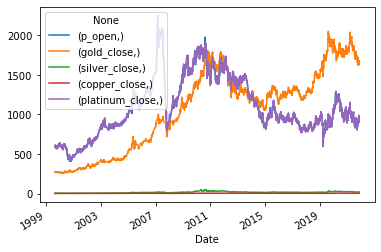

In [18]:
son_pla.plot()

In [22]:
r_sq = reg.score(X, y)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', reg.intercept_)

# Print the Slope:
print('slope:', reg.coef_) 

# Predict a Response and print it:
y_pred = reg.predict(X)
print('Predicted response:', y_pred, sep='\'')

NameError: name 'reg' is not defined

In [21]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)


NameError: name 'linear_model' is not defined